## Scientific Computing
### Lesson 1
[Software, Data and
Technology](https://lp.jetbrains.com/software-data-and-technology-constructor-university/) bachelor program at [Constructor
University](https://constructor.university) (Bremen).

*Ilya Schurov, 2024*

### Jupyter notebooks
#### First glance
This is a Jupyter notebook. It contains text and code cells. You can open this notebook in an IDE like PyCharm or VSCode, then run code cells by selecting them and pressing `Shift+Enter`. (If it doesn't work, see section [Installing Jupyter kernel to the system](#Installing-Jupyter-kernel-to-the-system) below.)

In [1]:
print("Hello, World!")
print("Welcome to Jupyter!")

Hello, World!
Welcome to Jupyter!


The result of the last line in a cell is printed automatically.

In [2]:
2 + 2

4

In [3]:
x = 5
y = 7
y + 1  # this line is not printed
x ** 2  # this line is printed

25

The state of the interpreter is preserved between cell runs. You can define variables in one cell and use them in another.

In [4]:
y  # uses the value defined in the previous cell

7

#### Pros and cons
The main advantage of Jupyter is that it allows to interact with the code and immediately see the results. This is especially useful when you are exploring some data or trying to understand how some algorithm works. You can run a cell, see the result, change the code, run the cell again, and see how the result changes. This is much faster than the traditional cycle of edit-compile-run-debug.

However, this interactivity comes at a cost.

The cells are executed in the order they are run, not in the order they are written. Sometimes this can be useful: for example, you can return to a cell at the beginning of the notebook, edit it and run again to redefine some variables. At the same time, it means that you cannot reconstruct the state of the interpreter at any particular moment just by looking at the source code, as you usually can do with the ordinary programming. In other words, there is a *hidden state* in your development process, that can easily introduce subtle errors you can spend hours debugging.

For example, you can introduce a function, use it in some subsequent cells, then discover that you made a typo in your function name, and fix it at the definition. If you forget to fix the name in the subsequent cells, you will invoke the old function, that is not defined anywhere in your source code, and think that you invoke the function that you just fixed. If you now try to change the behaviour of the function, you will be surprised that nothing changes in the subsequent cells.

There are other disadvantages of using Jupyter notebooks. As your project grows, you need to define more functions, and the notebook can become cluttered by them. Moreover, if you ever need to reuse some functions in another notebook, there are no easy way to do that without copy-pasting the code.
 
#### Best practices

1. **Do not rely on the order of cell execution.** Keep the notebook in a state where you can run it from the beginning to the end, and achieve the results you expected.
2. If something goes wrong, and you don't understand why, it is often a good idea to **restart the kernel and run all cells** from the beginning.
![Restart and run all buttons in JetBrains Jupyter interface](pics/restart-and-run-all.png)
3. The usual process is that you write some code interactively, then make a function from it, and then **move that function to a separate Python file** and import it back to the notebook. This way you can keep your notebook clean and focused on the main ideas, while the implementation details are hidden in the imported modules.

For example, assume that at some point I found that I need to find a product of several numbers. I can start with writing a code in a cell like this:

In [5]:
numbers = [1, 3, 7, 5]
prod = 1
for n in numbers:
    prod *= n
prod

105

I can check that my code works as expected by changing the `numbers` variable and running the cell again. Then I can make a function from this code:

In [6]:
def prod(numbers):
    p = 1
    for n in numbers:
        p *= n
    return p


assert prod([1, 2, 3]) == 6
assert prod([1, 2, 3, 4]) == 24

Now I can move this function to a separate file, say `lesson01_funcs.py`, and import it back to the notebook:

In [7]:
from lesson01_funcs import prod

prod([1, 2, 3])

6

Now I can remove cells with my initial experiments and the function definition from the notebook. It is also useful to keep all imports at the beginning of the notebook, to make sure that you can use the imported function anywhere in the notebook.

#### Markdown cells
You can write text in Markdown cells. You can use Markdown syntax to format the text, add links, images, and even LaTeX formulas. These comments are written in Markdown cells. You can change the cell type to Markdown by selecting the cell, pressing `Esc` (this will switch you to so-called *command mode*), than pressing `M`. To switch cell back to code, press `Y`.

#### Running notebooks in IDE and browser
Initially, Jupyter notebooks were designed to be run in a browser. The Jupyter itself works as a local server that can be accessed via URL like `https://localhost:8888` or `https://127.0.0.1:8888`, that points to your own computer. Though it uses the browser, Jupyter does not require Internet connection by itself, as everything works locally.

However, now you can run Jupyter notebooks in many IDEs, like PyCharm or VSCode. The IDEs provide more features for code editing, like syntax highlighting, code completion, and refactoring. For example, if I command click on the function `prod` in the cell above, PyCharm will show me the definition of this function in the `lesson01_funcs.py` file. This is very useful when you work with large projects.

Still sometimes we want to open notebook in a browser. In PyCharm, it can be done with the corresponding button.
![Open in browser button in JetBrains Jupyter interface](pics/open-in-browser.png)

### Virtual environments
#### Why do we need them?
It can be surprising, but Python is very bad for scientific computing. It is an interpreted language with dynamic typing, and thus it is extremely slow in doing numerical computations. Why Python is so popular then? The main reason is that it is rather easy to write and read, and it has a lot of libraries for various tasks. Many of these libraries are in fact work as an interface to algorithms that implemented in C, C++ or Fortran. This way you can write a code in Python, and the heavy computations are done in the compiled code.

The downside of this approach is that Python alone is not very useful, and you need to install a lot of packages to make it work for you. Moreover, some packages require other packages, and some packages require specific versions of other packages.

When you install Python packages, they could be installed globally on your computer. This means that if you install two packages that require different versions of some third package, you can run into problems. Moreover, if you work on several projects, and one project requires some package, and another project requires another version of the same package, you can run into the same problems. This is called *dependency hell*.

To avoid this, you can use virtual environments. A virtual environment is a separate Python installation that contains only the packages you need for a particular project. This way you can have different versions of the same package in different virtual environments, and they will not interfere with each other.

#### conda environments
There are different tools for creating virtual environments in Python, e.g. `virtualenv`, `venv`, `poetry`, `uv` and `conda`. We will use `conda`, as it is the most popular in scientific computing community. The main advantage of `conda` is that it allows installing not only Python packages themselves, but also various tools that may be needed to install those packages like compilers, linkers, low-level libraries, etc. Without `conda`, it can be difficult to install e.g. package that requires compilation of Fortran code, especially on Windows.

#### Creating a conda environment
In PyCharm, you can create a new `conda` environment when you create a new project.

![Create new project dialog in PyCharm](pics/create-new-project.png)

We usually want to create a new environment for each project, so it is a good idea to name the environment after the project. You can also specify the Python version you want to use in the environment.

For already created project, you can select an environment or create a new one in the `Python interpreter` settings of your project (available from the PyCharm settings).

#### Environments and Jupyter kernels
An instance of Python interpreter that you are interact with using Jupyter notebook is called a *kernel*. In PyCharm, when you are working with a project that uses a virtual environment, the corresponding kernel is usually created automatically, and is called like "Python 3 (ipykernel)".

![Selecting kernel in PyCharm](pics/ipykernel.png)

It is always possible to check that you are using the kernel you want by running the following code:

In [8]:
import sys

sys.executable

'/Users/user/miniconda3/envs/scientific-computing-2024-lesson01/bin/python'

The variable `sys.executable` contains the path to the Python interpreter that is used by the kernel. If it points to the Python executable in your virtual environment, you are good to go.

If you changed the environment of your project, you may need to stop Jupyter first, then try to execute any cell again.

![Stop Jupyter](pics/stop-jupyter.png)

#### Installing Jupyter kernel to the system
If you don't see the kernel that corresponds to the environment you are needed, you can install it manually from the command line. First, you need to make sure that the environment is activated. If you are working in PyCharm's terminal, this is usually done automatically. 

![PyCharm terminal with activated environment](pics/pycharm-terminal.png)
If you are working in a system terminal, you can activate the environment with the following command:

```bash
conda activate <myenv>
```
where `<myenv>` is the name of the environment you want to use.

Then you can install the kernel with the following command:
```bash
python -m ipykernel install --user --name="Python 3 (<myenv>)"
```
Again, replace `<myenv>` with the name of your environment. This command will install the kernel that points to the Python interpreter in the environment `myenv`. Then you can use this kernel in Jupyter notebooks (probably, after restart).

#### Installing packages
There are two package managers that can be used to install packages into `conda` virtual environments: `conda` and `pip`. It is generally advised to stick with `conda`, as mixing `conda` and `pip` packages can lead to problems with the dependencies. At the same time, sometimes you need to use `pip`, as some packages are not available in `conda` repositories.

You can invoke `conda` and `pip` commands in the Terminal, but it is also possible to do so from the notebook itself, using so-called *magic commands*. For example, you can install a package `numpy` with `conda` by running the following cell:

In [9]:
%conda install numpy

Channels:
 - defaults
 - conda-forge
Platform: osx-64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


Note the percentage sign at the beginning of the line: it means that this is a command for Jupyter, and not a Python code.

If you are using right kernel, the package will be installed into the environment that corresponds to this kernel. Most of the third-party packages are available from the so-called `conda-forge` repository, so they have to be installed with the following command (this installs `seaborn`, a popular visualization library):

```
%conda install -c conda-forge seaborn
```

You can use `pip` in a similar way.

```
%pip install -U seaborn
```

The `-U` flag means that the package will be upgraded if it is already installed.

#### Exporting the environment
It is a good idea to keep track of the packages you use in your project. You can do this by exporting the list of packages to a file. This way you can recreate the environment on another machine, or share it with your colleagues.

You can export the environment with the following command:

```
%conda env export > environment.yml
```

In [10]:
%conda env export > environment.yml


Note: you may need to restart the kernel to use updated packages.


The environment file will contain information about the packages you have installed, both with `conda` and `pip`, and the versions of those packages. You can recreate the environment on another machine by running the following command:

```bash
conda env create -f environment.yml
```

#### Environments and reproducibility
Software programming is a dynamic world, where new versions of packages are released, and old versions are deprecated. This can lead to the situation when the code that worked yesterday, does not work today, because some package was updated, old functions were removed or their behaviour changed. This is another reason to use virtual environments: you can freeze the versions of the packages you use, and be sure that your code will work in the future. 

### Intro to `numpy`
As I said, Python is not very good for numerical computations. One of the most important library that allows you to do efficient numerical computations in Python is `numpy`. It provides a lot of functions to work with arrays and matrices, and is very fast. Let's check it out.

In [11]:
import numpy as np
# this is the usual way to import numpy

Assume I want to calculate the squares of first 10 million integers. I can do this with a list comprehension:

In [12]:
numbers = list(range(10_000_000))

In [13]:
squares = [n ** 2 for n in numbers]

This took around 1.5 seconds on my machine. We can find the time it took to execute the cell more precisely by using the magic command `%%time`:


In [14]:
%%time
squares = [n ** 2 for n in numbers]

CPU times: user 953 ms, sys: 247 ms, total: 1.2 s
Wall time: 1.26 s


Now let's do the same with `numpy`. To do so, we convert the list of integers to a `numpy` array. Instead of using a list comprehension, we can use the `**` operator directly on the array, and `numpy` will calculate the squares elementwise.

In [15]:
numbers_np = np.array(numbers)

In [16]:
squares_np = numbers_np ** 2

Much faster! We can also check the time with the `%%time` magic command:

In [17]:
%%time
squares_np = numbers_np ** 2

CPU times: user 29.8 ms, sys: 36.8 ms, total: 66.6 ms
Wall time: 64.6 ms


How is that possible? The main reason is that Python's list contains not numbers themselves, but references to the objects that represent numbers. This means that when you do `n ** 2`, Python has to find the method `__pow__` of the object `n`, call it, and create a new object that represents the result. This is a lot of work. Moreover, as the actual numbers are not stores in a contiguous memory block, various low-level optimizations are not possible. This makes this calculation slow. Instead, `np.array` is a contiguous block of memory that stores numbers themselves, and `numpy ** 2` is basically an invocation of a single C-loop that iterates over these numbers and finds their squares, with various low-level optimizations applied. For example, it can be made parallel, or processor cache can be used more efficiently.

As usual, this comes at a cost. For example, Numpy arrays are not as flexible as Python lists. Python list can contain objects of various types. Numpy array is a homogeneous data structure, and all elements have to be of the same type. For example:


In [18]:
squares_np.dtype

dtype('int64')

The `.dtype` attribute of a numpy array shows the type of the elements in the array. In this case, it is `int64`, which means that the array contains 64-bit integers. What happens if we try to put float there?

In [19]:
numbers_np[0] = 3.14

In [20]:
print(numbers_np[0])

3


The float number was silently truncated to an integer. No error is given!

Another example: let's take the last element of our array and raise it to the power of 100. What do you think will happen?

In [21]:
print(numbers_np[-1] ** 100)

-1834783232789924351


What? How come we have a negative number here? Let's try to do the same thing with Python list:

In [22]:
numbers[-1] ** 100

9999900000494998383003921217471259920507992457808770407699226295293470039843400528918892534348992360077633634001255508362742104354574189740077395423404247100683924676355554733454810442603053708336951762623401797689047933948028583733094224232903308082089400564440992729344321159754265979921881398701964429719995173390944075177061249555494939151356615596125098190632903366069513350280716056285348267704099441134462907667740853743702959196101821484045364871578391804544159727020065741617270208460454429087174141029019481869218371450300770815205228203591365269569387463974734464885857129679568705556626936052429036943719708743092662168210208789269924393192052392471248039212249838300000494999999000000001

Here we obtained a long positive integer number. So, what happened with `numpy`? The point is that Python's `int` can store arbitrary large integer numbers. The larger the number, the more memory it takes, but as you have enough memory, it can be as large as you want. `numpy`'s `int64` is a fixed-size integer, and it can store numbers from $-2^{63}$ to $2^{63} - 1$. If you try to store a number that is larger than this, it will overflow and wrap around. This is what happened in our case.

These examples show that `np.array` is closer to the low-level representation of the data in the memory. It makes it efficient, but it also requires some attention. We will see more examples of this in the next lessons. 

### Drawing pictures
Let's do something fun: draw some pictures. First, we will install `matplotlib`, a main Python library for plotting.

In [23]:
%conda install matplotlib   

Channels:
 - defaults
 - conda-forge
Platform: osx-64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


`matplotlib` is a library that allows drawing various images using primitives like lines, circles, etc. We will use `pyplot`, a part of matplotlib dedicated to plotting graphs.

In [24]:
import matplotlib.pyplot as plt

The graphs drawn with `matplotlib` can be displayed in a separate window or in the notebook itself. Sometimes it is needed to run magic command `%matplotlib inline` to make the graphs appear in the notebook. Now it works without this command, but if you have problems with displaying the graphs, you can try to run this command.

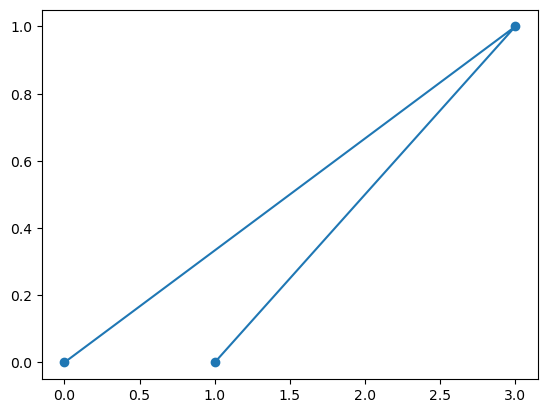

In [25]:
plt.plot([0, 3, 1], [0, 1, 0], 'o-')

`plt.plot` allows to draw points and lines by providing coordinates of the points. The first list is the x-coordinates of the points, the second list is the y-coordinates. The third argument is a string that specifies the style of the line. In this case, `o-` means that we draw a line with circles at the points.

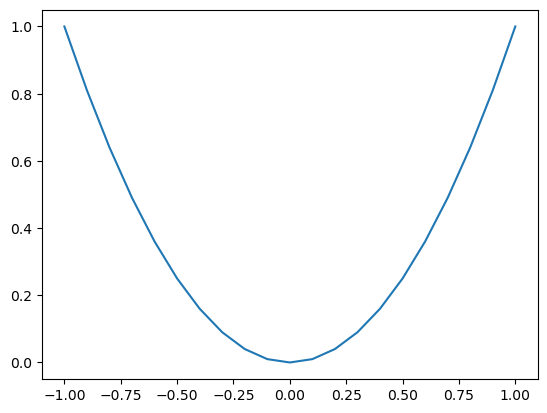

In [26]:
plt.plot([x / 10 for x in range(-10, 11)],
         [(x / 10) ** 2 for x in range(-10, 11)])

Probably, not the best way to draw a parabola. Let's use `numpy` to do this more efficiently.

First, consider function `np.linspace`. This function generates a sequence of numbers between two given numbers, placed evenly. For example:

In [27]:
np.linspace(-1, 1, 11)

array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ])

We will use `np.linspace` to generate the x-coordinates of the points on the parabola, and then calculate the y-coordinates using `numpy` operations.

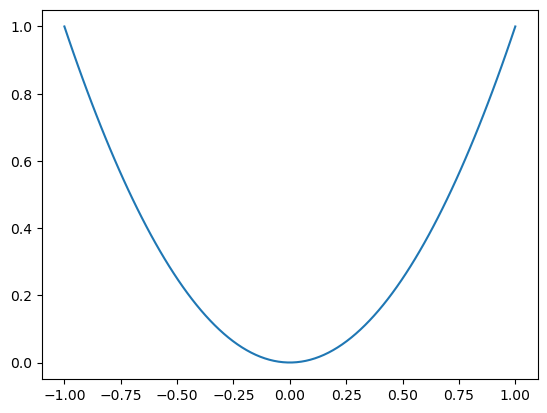

In [28]:
x = np.linspace(-1, 1, 100)
plt.plot(x, x ** 2)

Note how elementwise application of operations plays nicely with `plt.plot`: the second argument looks just like a formula that is used to define a function whose graph we are plotting. We can use other mathematical functions from `numpy` to draw more complex graphs. For example, let's draw a sine function:

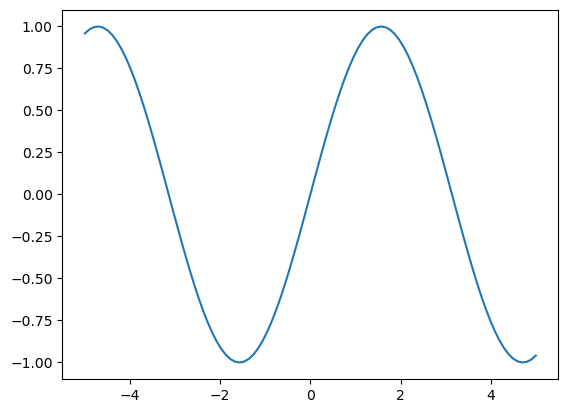

In [29]:
x = np.linspace(-5, 5, 100)
plt.plot(x, np.sin(x))

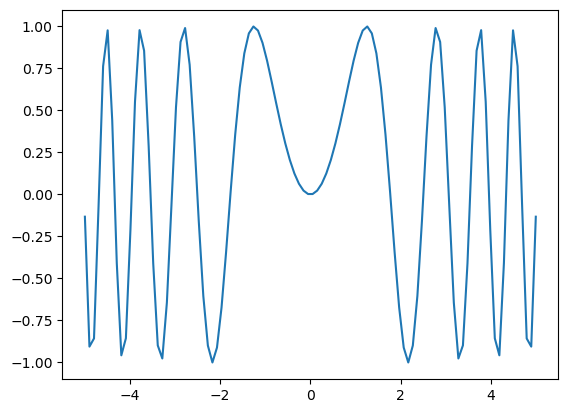

In [30]:
x = np.linspace(-5, 5, 100)
plt.plot(x, np.sin(x ** 2))

If we want to investigate the graph more closely, we can change the range of the x-coordinates:

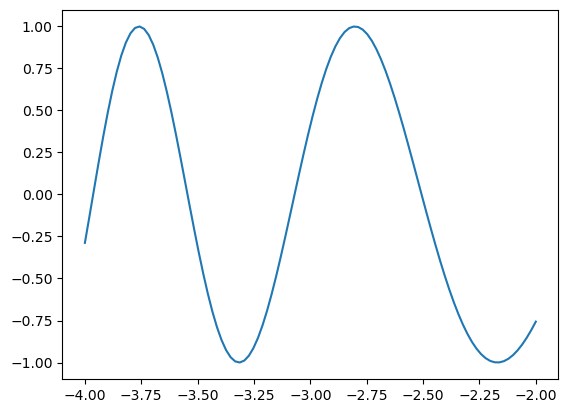

In [31]:
x = np.linspace(-4, -2, 100)
plt.plot(x, np.sin(x ** 2))

But sometimes we want to do it interactively. We can use `ipympl` library to create interactive plots. Let's install it first.

In [32]:
%conda install ipympl

Channels:
 - defaults
 - conda-forge
Platform: osx-64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


Then switch the backend of `matplotlib` to `widget`:

In [33]:
%matplotlib widget

Now the pictures plotted by matplotlib would be interactive: you can zoom in and out, pan, and save the picture.

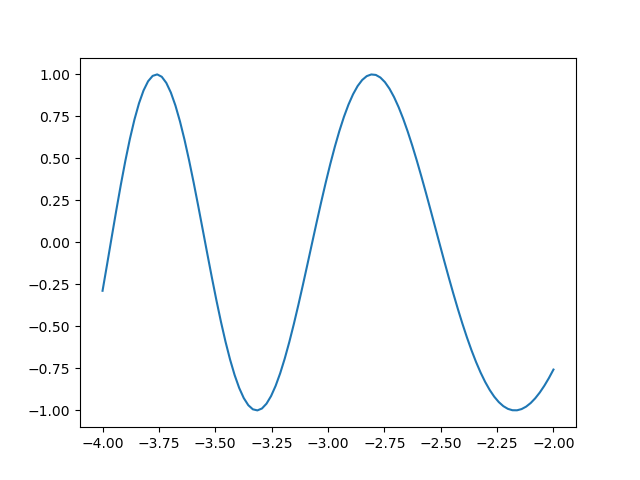

In [34]:
x = np.linspace(-4, -2, 100)
plt.plot(x, np.sin(x ** 2))

It is possible to implement complex interactivity by adding event handlers to the plots. For example, we can draw a circle and change its radius by dragging a slider. But we will not do it now.

Here is another trick: quick animations. There are cases when you want to visualize process of some computation, e.g. how your model outputs change when you train it. The easiest way to do it is to use some features of Jupyter notebooks. It is possible that this will not work in your IDE, but it should work in the browser.

In [35]:
%matplotlib inline 
# switch matplotlib to the usual mode

In [36]:
from IPython.display import display, clear_output
import time

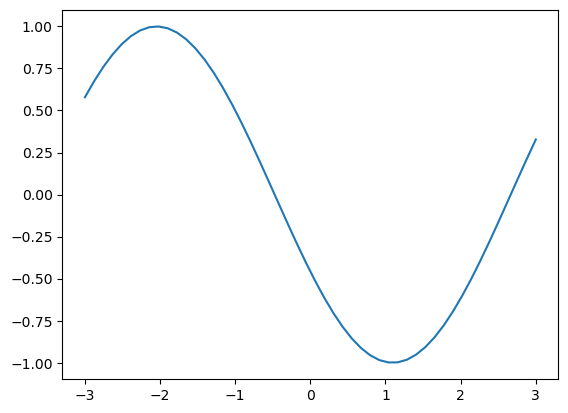

In [37]:
x = np.linspace(-3, 3)
fig = plt.figure()
for i in range(100):
    clear_output(wait=True)
    plt.gca().clear()
    plt.plot(x, np.sin(x + i / 10))
    display(fig)
    time.sleep(0.1)

### Example: let's draw Mandelbrot fractal

The well-known Mandelbrot set is defined in the following way. Consider the sequence of complex numbers $z_n$ defined by the following rule:

$$
z_0=0,\quad z_{n+1} = z_n^2 + c
$$

where $c$ is a complex number. The Mandelbrot set is the set of complex numbers $c$ for which the sequence $z_n$ does not diverge to infinity. In other words, if the absolute value of $z_n$ is greater than some threshold, we consider that the sequence diverges. We draw the Mandelbrot set by coloring the points in the complex plane according to the number of iterations before the sequence diverges.

Here is a pure Python implementation of this algorithm:

In [38]:
pmin = -3
pmax = 1.3
qmin = -1.5
qmax = 1.5
width = 1000
height = 800
ps = np.linspace(pmin, pmax, width)
qs = np.linspace(qmin, qmax, height)
image = []
for q in qs:
    row = []
    image.append(row)
    for p in ps:
        c = p + 1j * q
        z = 0
        for k in range(256):
            z = z ** 2 + c
            if abs(z) > 2:
                break
        row.append(k % 5)  # use remainder to make the image more colorful

This code generates a list of lists `image` that contains numbers from 0 to 4. We can draw this image using `plt.imshow` function.

In [47]:
%matplotlib widget

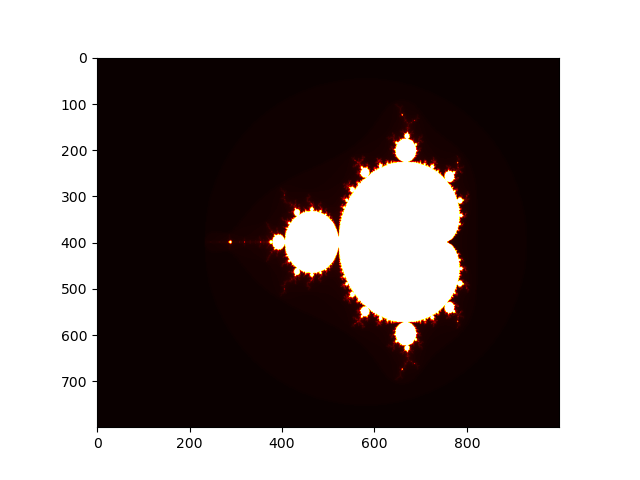

In [48]:
plt.imshow(image, cmap='hot')

Let's make it faster using `numpy`. Note that each pixel of the image is calculated independently, so we can use `numpy` to calculate the whole image at once. To this end, we will maintain two-dimensional array of complex numbers `cs` that correspond to the points of the image, and two-dimensional array `zs` that will contain the sequence $z_n$ for each point. We also need two-dimensional array `image` to store the output image. 

First, we need to fill in the `cs` array. This can be done with some numpy magic (`np.meshgrid` function), but I want to keep things simple for now, so fill in the arrays with loops.

In [41]:
cs_list = []
for q in qs:
    c_row = []
    cs_list.append(c_row)
    for p in ps:
        c_row.append(p + 1j * q)
cs = np.array(cs_list)

Now create zero-filled arrays `zs` and `image`:

In [42]:
zs = np.zeros_like(cs)
image = np.zeros_like(cs, dtype=np.int64)

And now the main loop:

In [43]:
for k in range(256):
    zs = zs ** 2 + cs
    image += (np.abs(zs) < 2) * 1

/var/folders/h2/9nyrt4p55kq6pdvqg02_zmj40000gn/T/ipykernel_88982/1644721883.py:2: RuntimeWarning: overflow encountered in square
  zs = zs ** 2 + cs
/var/folders/h2/9nyrt4p55kq6pdvqg02_zmj40000gn/T/ipykernel_88982/1644721883.py:2: RuntimeWarning: invalid value encountered in square
  zs = zs ** 2 + cs


Here we used some magic: as I said, all operations with numpy arrays are elementwise, including comparisons. It means that `(np.abs(zs) < 2)` returns two-dimensional array filled with boolean values `True` and `False`. When we multiply this array by `1`, numpy converts `True` to `1` and `False` to `0`. This way we can count the number of iterations before the sequence diverges.

In [55]:
%matplotlib widget

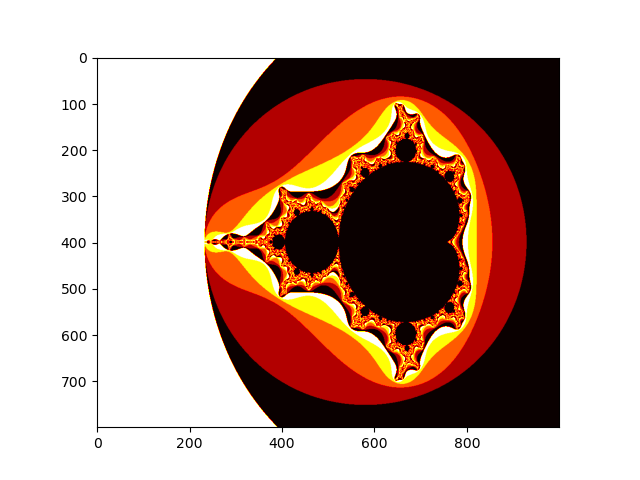

In [56]:
plt.imshow((image - 1) % 5, cmap='hot')

That's all for today!

### See also
- [I Don't Like Notebooks - Joel Grus - #JupyterCon 2018](https://docs.google.com/presentation/d/1n2RlMdmv1p25Xy5thJUhkKGvjtV-dkAIsUXP-AL4ffI/edit#slide=id.g362da58057_0_1) — an excellent presentation on the problems with Jupyter notebooks.
- [Why Python is Slow: Looking Under the Hood](http://jakevdp.github.io/blog/2014/05/09/why-python-is-slow/) — a blog post by Jake VanderPlas on the reasons why Python is slow.